# Logistic Regression in Python 

- Around 70% of datascience problem are classification problem 
- There are lost of classificaiton problem among them **binary classificaiton problem** is solved using logistic regression. 
- Logistic regression is used for many binary classificaiton problems they are: 
    - Spam detection: We determine wheater the email is spam or not spam (Yes, No) 
    - Diabetis prediction: Wheather the person has diabetis or not (Symptoms, test_result) 
    - Wheather a person will buy the particular product or not. **Support** 
    - User analysis wheather the user will click the link or not

In [7]:
import pandas as pd 
import numpy as np

col_names = ['pregnant', 'glucose','bp','skin','insulin','bmi','pedigree','age','label']

pima = pd.read_csv("pima-indians-diabetes.csv",header = None, names =col_names)

pima.head()



,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:

#check if null
print(pima.isnull().sum())

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [9]:
#feature selection 
#split dataset into train and test 

featured_cols = ['pregnant', 'glucose','bp','skin','insulin','bmi','pedigree','age']

X = pima[featured_cols] 
y = pima.label #target variable 

# print(X)
# print(y)

In [11]:
#train test split 

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=16)

print(X_train.shape) 
print(X_test.shape) 

(614, 8)
(154, 8)


In [12]:
#model 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16, max_iter=500)
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test) 

print(y_pred) 


[1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0]


# Model Evaluation with confusion matrix 


In [13]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[95,  7],
       [21, 31]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

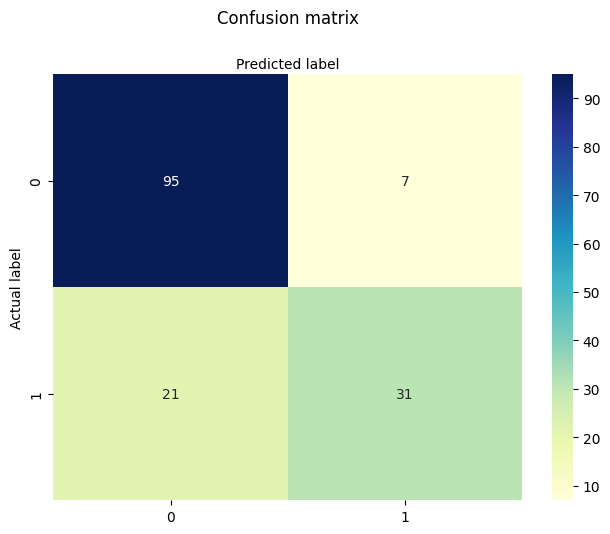

In [15]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');